In [2]:
import numpy as np # numerical analysis
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

#### Read the data

In [3]:
data= pd.read_csv("50_Startups.csv")

#### EDA

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.shape

(108, 5)

In [6]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,113523.760000
std,44996.368152,27322.385654,117937.942120,38991.013654
min,0.000000,51283.140000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,90708.190000
50%,75791.365000,122699.795000,239452.750000,109543.120000
75%,101913.080000,145077.580000,298664.470000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [8]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

#### correlation

In [9]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241379,0.725978,0.964770
Administration,0.241379,1.000000,-0.024699,0.198849
Marketing Spend,0.725978,-0.024699,1.000000,0.748957
Profit,0.964770,0.198849,0.748957,1.000000


<AxesSubplot:>

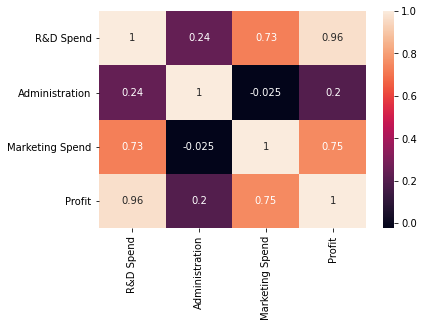

In [10]:
sns.heatmap(data.corr(),annot=True)

In [11]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
data.isnull().sum()  # fillna

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

#### Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['State']=le.fit_transform(data['State'])

In [15]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


C:\Users\HP\Anaconda3\envs\cricket\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

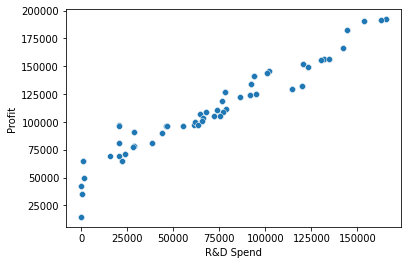

In [16]:
sns.scatterplot(data['R&D Spend'],data['Profit'])

C:\Users\HP\Anaconda3\envs\cricket\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='count'>

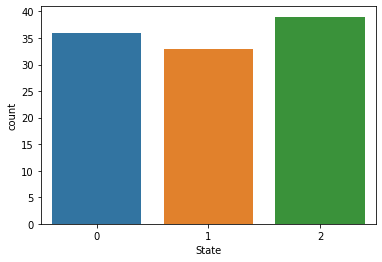

In [17]:
sns.countplot(data['State'])

In [19]:
x=data.iloc[:,0:4]
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [20]:
y=data.iloc[:,[4]]
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [23]:
y_pred=dtr.predict(x_test)

In [26]:
y_pred[:5]

array([ 49490.75, 146121.95,  90708.19, 191050.39, 108552.04])

In [28]:
y_test[:5]

,Profit
84,64926.08
10,146121.95
75,90708.19
2,191050.39
24,108552.04


In [24]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9850871038123828

In [25]:
y_pred_train=dtr.predict(x_train)
r2_score(y_pred_train,y_train)

1.0